# Animations to illustrate stats concepts

16 09 24

Notebook for creating animations to illustrate some concepts in machine learning and statistics, including:

- Bias
- Variance
- Overfitting
- Underfitting
- Multivariable regression

Ideas to get across:
- When the true distribution of the data is non-linear, a linear model will fit poorly but without much variation between different sets of samples, i.e., it is underfitting (high bias, low variance)
- Model that is overly complex will fit the specific sample well, but this model will vary a lot between different sets of samples, i.e., it is overfitting (low bias, high variance)

Questions
- How to relate back to the clinical question?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
sns.set_style('white')

## Create some data

Polynomials of various degree

In [3]:
# amplitude of noise
sigma = 2

# x values in the sample
x = np.arange(0, 10, 0.5).reshape(-1, 1)

# fine-grained x values to produce smoother predictions
x_fine = np.arange(0, 10, 0.01).reshape(-1, 1)

# 2nd degree polynomial
poly = PolynomialFeatures(2)
x_p2 = poly.fit_transform(x)
x_finep2 = poly.fit_transform(x_fine)

# 5th degree polynomial
poly = PolynomialFeatures(5)
x_p5 = poly.fit_transform(x)
x_finep5 = poly.fit_transform(x_fine)

# 10th degree polynomial
poly = PolynomialFeatures(10)
x_p10 = poly.fit_transform(x)
x_finep10 = poly.fit_transform(x_fine)

# 20th degree polynomial
poly = PolynomialFeatures(20)
x_p20 = poly.fit_transform(x)
x_finep20 = poly.fit_transform(x_fine)

## Fit models

### Linear model

In [4]:
# how many times do we sample?
num_repeats = 128

# r^2 values
r2_vals = []

# linear model
reg = LinearRegression()

# dataframe for storing x values and later the y measurements and predictions
df = pd.DataFrame(data={'x': x[:, 0]})

# dataframe for storing the fine-grained x values and the smoother predictions
df_fine = pd.DataFrame(data={'x': x_fine[:, 0]})

y_true = x_fine * (10 - x_fine)
df_fine['y_true'] = y_true

# generate the data and fit the models
for n in range(0, num_repeats):
    # noise
    e = np.random.randn(*x.shape)*sigma

    # observed data
    y = x * (10 - x) + e

    # store the measurements in the dataframe
    df[f'y_{n}'] = y

    # fit linear regression then make predictions
    reg.fit(x, y)

    # r^2 value for the given model fit
    r2_vals.append(reg.score(x, y))

    # predictions on the fine-grained x values
    y_preds = reg.predict(x_fine)

    # store in the fine-grained x dataframe
    df_fine[f'y_{n}'] = y_preds[:, 0]

# make a tidy dataframe
df_tidy = pd.melt(df, id_vars=['x'])
df_fine_tidy = pd.melt(df_fine, id_vars=['x'])

## Animations and static images

### Illustrating a model with high bias and low variance

In [5]:
palette = sns.color_palette('colorblind')

In [ ]:
# static plots
%matplotlib inline 

plt.figure(figsize=(6, 4))
for n in range(num_repeats):
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.03) 
sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])
sns.scatterplot(data=df_tidy.query('variable == "y_0"'), x='x', y='value', color=palette[3])
sns.lineplot(data=df_fine_tidy.query('variable == "y_0"'), x='x', y='value', color=palette[3])
sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.title('Linear model')
plt.show()

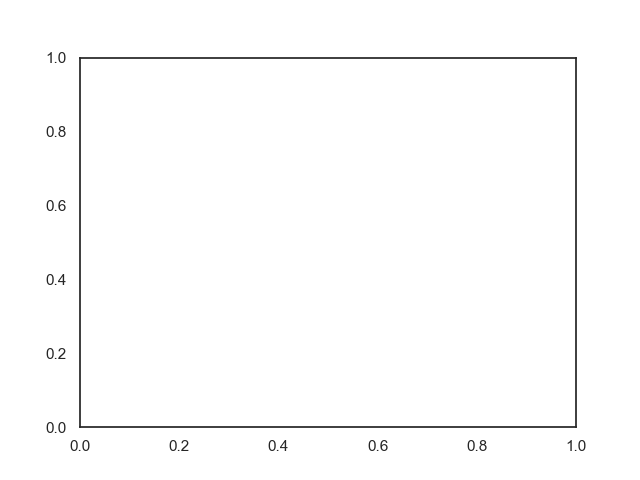

In [705]:
# animation
%matplotlib widget 

sns.set_style('white')
def create_frame(step, ax):
    ax.cla()  # Clear the axes for each frame
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 30)

    # plot all the model fits
    for n in range(num_repeats):
        sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.03) 

    # plot the average model over all the fits
    sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])

    # the best fit for the given sample
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # scatterplot for the given sample
    sns.scatterplot(data=df_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # true model
    sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')

    # Set labels (but not for every frame)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('Linear model')

# Initialize the figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, create_frame, frames=100, fargs=(ax,))

In [ ]:
# display the animation
HTML(animation.to_jshtml())

In [205]:
# save the animation to a file
animation.save('animation_linear_model.mp4', writer='ffmpeg', fps=5)

### Model with low bias but high variance

In [706]:
# 10th degree polynomial
poly = PolynomialFeatures(10)

x_p10 = poly.fit_transform(x)
x_finep10 = poly.fit_transform(x_fine)

# how many times do we sample?
num_repeats = 128

# r^2 values
r2_vals = []

# linear model
reg = LinearRegression()

# dataframe for storing x values and later the y measurements and predictions
df = pd.DataFrame(data={'x': x_p10[:, 1]})

# dataframe for storing the fine-grained x values and the smoother predictions
df_fine = pd.DataFrame(data={'x': x_finep10[:, 1]})

y_true = x_fine * (10 - x_fine)
df_fine['y_true'] = y_true

# generate the data and fit the models
for n in range(0, num_repeats):
    # noise
    e = np.random.randn(*x.shape)*sigma

    # true data
    y = x * (10 - x) + e

    # store the measurements in the dataframe
    df[f'y_{n}'] = y

    # fit linear regression then make predictions
    reg.fit(x_p10, y)

    # r^2 value for the given model fit
    r2_vals.append(reg.score(x_p10, y))

    # predictions on the fine-grained x values
    y_preds = reg.predict(x_finep10)

    # store in the fine-grained x dataframe
    df_fine[f'y_{n}'] = y_preds[:, 0]

# make a tidy dataframe
df_tidy = pd.melt(df, id_vars=['x'])
df_fine_tidy = pd.melt(df_fine, id_vars=['x'])

In [ ]:
# static plot
%matplotlib inline 
sns.set_style('white')

plt.figure(figsize=(6, 4))

# plot all the model fits
for n in range(num_repeats):
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.05) 

# plot the average
sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])

# scatter plot for the given sample
sns.scatterplot(data=df_tidy.query('variable == "y_0"'), x='x', y='value', color=palette[3])

# plot a the best fit for the given sample
sns.lineplot(data=df_fine_tidy.query(f'variable == "y_0"'), x='x', y='value', color=palette[3])

sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.title('10th degree polynomial')
plt.savefig('10degree_polynomial.png')

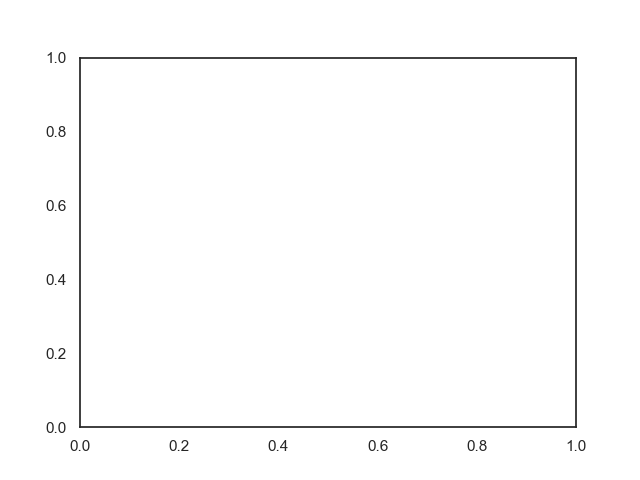

In [711]:
# animation
%matplotlib widget 
sns.set_style('white')

def create_frame(step, ax):
    ax.cla()  # Clear the axes for each frame
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 30)

    # plot all the model fits
    for n in range(num_repeats):
        sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.03) 

    # plot the average model over all the fits
    sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])

    # the best fit for the given sample
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # scatterplot for the given sample
    sns.scatterplot(data=df_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # true model
    sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')

    # Set labels (but not for every frame)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('10th degree polynomial')

# Initialize the figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, create_frame, frames=100, fargs=(ax,))

In [ ]:
# display the animation
HTML(animation.to_jshtml())

In [211]:
# save the animation to a file
animation.save('animation_10degree_polynomial.mp4', writer='ffmpeg', fps=5)

## 2d degree polynomial

In [712]:
# 10th degree polynomial
poly = PolynomialFeatures(2)

x_p2 = poly.fit_transform(x)
x_finep2 = poly.fit_transform(x_fine)

# how many times do we sample?
num_repeats = 128

# r^2 values
r2_vals = []

# linear model
reg = LinearRegression()

# dataframe for storing x values and later the y measurements and predictions
df = pd.DataFrame(data={'x': x_p2[:, 1]})

# dataframe for storing the fine-grained x values and the smoother predictions
df_fine = pd.DataFrame(data={'x': x_finep2[:, 1]})

# the true model
y_true = x_fine * (10 - x_fine)
df_fine['y_true'] = y_true

# generate the data and fit the models
for n in range(0, num_repeats):
    # noise
    e = np.random.randn(*x.shape)*sigma

    # true data
    y = x * (10 - x) + e

    # store the measurements in the dataframe
    df[f'y_{n}'] = y

    # fit linear regression then make predictions
    reg.fit(x_p2, y)

    # r^2 value for the given model fit
    r2_vals.append(reg.score(x_p2, y))

    # predictions on the fine-grained x values
    y_preds = reg.predict(x_finep2)

    # store in the fine-grained x dataframe
    df_fine[f'y_{n}'] = y_preds[:, 0]

# make a tidy dataframe
df_tidy = pd.melt(df, id_vars=['x'])
df_fine_tidy = pd.melt(df_fine, id_vars=['x'])

In [ ]:
# static plot
%matplotlib inline 
sns.set_style('white')

plt.figure(figsize=(6, 4))

# plot all the model fits
for n in range(num_repeats):
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.03) 

# plot the average
sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])

# scatter plot for the given sample
sns.scatterplot(data=df_tidy.query('variable == "y_0"'), x='x', y='value', color=palette[3])

# plot a the best fit for the given sample
sns.lineplot(data=df_fine_tidy.query(f'variable == "y_0"'), x='x', y='value', color=palette[3])

# the true model
sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.title('2nd degree polynomial')
plt.savefig('2degree_polynomial.png')

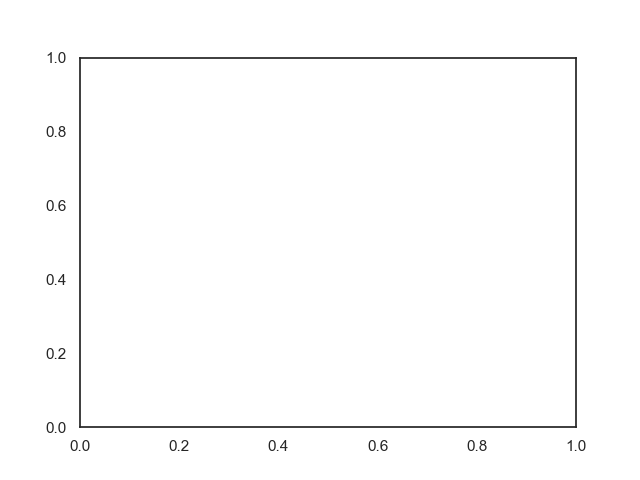

In [215]:
# animation
%matplotlib widget 
sns.set_style('white')

def create_frame(step, ax):
    ax.cla()  # Clear the axes for each frame
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 30)

    # plot all the model fits
    for n in range(num_repeats):
        sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{n}"'), x='x', y='value', color=palette[0], alpha=0.03) 

    # plot the average model over all the fits
    sns.lineplot(data=df_fine_tidy.groupby(['x'], as_index=False).value.mean(), x='x', y='value', color=palette[0])

    # the best fit for the given sample
    sns.lineplot(data=df_fine_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # scatterplot for the given sample
    sns.scatterplot(data=df_tidy.query(f'variable == "y_{step}"'), x='x', y='value', color=palette[3])

    # the true model
    sns.lineplot(data=df_fine_tidy.query('variable == "y_true"'), x='x', y='value', color='black')

    # Set labels (but not for every frame)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('2nd degree polynomial')

# Initialize the figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, create_frame, frames=100, fargs=(ax,))

In [ ]:
# display the animation
HTML(animation.to_jshtml())

In [217]:
# save the animation to a file?
animation.save('animation_2degree_polynomial.mp4', writer='ffmpeg', fps=5)

## Variance and bias as a function of degree of polynomial

For each degree:
- For each set of draws from the distribution
  - Fit the model
  - Calculate the MSE
  - Calculate the variance
  - Calculate the bias
 
Point of confusion
- Variance, bias and error defined across different sets of samples for a given point vs over the given sample for all points
- Generally don't have access to the 'true model' and so variance, bias and error are estimates, based on the sample

Terminology:
- Clarify that *sample* references to the dataset while *example* is a given point from the dataset

To do:
- Better to start by explaining the concepts for a simple 0 degree model, then a linear model can be seen as one where each point has a given bias and variance associated with it.

In [253]:
# degrees of polynomials
degrees = np.arange(1, 20)

In [ ]:
# amplitude of noise
sigma = 2

# fine-grained x values to produce smoother predictions
x_fine = np.arange(0, 10, 0.01).reshape(-1, 1)

# 2nd degree polynomial

x_finep2 = poly.fit_transform(x_fine)

# 5th degree polynomial
poly = PolynomialFeatures(5)
x_p5 = poly.fit_transform(x)
x_finep5 = poly.fit_transform(x_fine)

# 10th degree polynomial
poly = PolynomialFeatures(10)
x_p10 = poly.fit_transform(x)
x_finep10 = poly.fit_transform(x_fine)

# 20th degree polynomial
poly = PolynomialFeatures(20)
x_p20 = poly.fit_transform(x)
x_finep20 = poly.fit_transform(x_fine)

In [ ]:
reg = LinearRegression()

# dataframe for storing x values and later the y measurements and predictions
df = pd.DataFrame(data={'x': x_p2[:, 1]})

# dataframe for storing the fine-grained x values and the smoother predictions
df_fine = pd.DataFrame(data={'x': x_finep2[:, 1]})

# the true model
y_true = x_fine * (10 - x_fine)
df_fine['y_true'] = y_true

In [691]:
var_all = []
bias2_all = []
mse_all = []
var_error_all = []

for degree in degrees:
    # predictions and true values for the given degree polynomial
    y_pred_temp = []
    y_obs_temp = []
    
    for n in range(1024):
        # x values in the sample
        x = np.arange(0, 10, 0.5).reshape(-1, 1)
        e = np.random.randn(*x.shape)*sigma
        y = x * (10 - x) + e

        # polynomial features
        poly = PolynomialFeatures(degree)
        x_p = poly.fit_transform(x)
        
        # fit the model
        reg = LinearRegression()
        reg.fit(x_p, y)

        # make predictions
        y_pred = reg.predict(x_p)
        
        y_pred_temp.append(y_pred)
        y_obs_temp.append(y)
        
    y_pred_temp = np.array(y_pred_temp)[:, :, 0]
    y_obs_temp = np.array(y_obs_temp)[:, :, 0]
    
    # calculate the bias, variance and MSE at each point over all samples
    mse = ((y_pred_temp - y_obs_temp)**2).sum(axis=0)
    pred_mean = y_pred_temp.mean(axis=0)
    obs_mean = y_obs_temp.mean(axis=0)
    var = y_pred_temp.var(axis=0)
    bias2 = (obs_mean - pred_mean)**2
    var_all.append(np.mean(var))
    bias2_all.append(np.mean(bias2))
    mse_all.append(np.mean(mse))
    var_error_all.append(np.var(y_obs_temp))

In [ ]:
%matplotlib inline

plt.figure(figsize=(6, 4))
plt.plot(degrees, bias2_all, c='blue')
plt.plot(degrees, var_all, c='red')
#plt.plot(degrees, mse_all, c='black')
plt.show()

In [298]:
mean = y_pred_temp.mean(axis=0)

In [682]:
var_error = 0.245
y_true = 3

num_points = 2**16

# observed
y_measured = 3 + np.random.randn(num_points)*np.sqrt(var_error) # true + noise

# predicted
y_pred = 2.5 + np.random.randn(num_points)*0.0

In [683]:
y_measured_mean = y_measured.mean()
y_pred_mean = y_pred.mean()

In [684]:
# variance
var = y_pred.var()

# bias squared
bias2 = (y_pred_mean - y_measured_mean)**2

mse = ((y_pred - y_measured)**2).mean()

In [685]:
y_measured.var()

np.float64(0.24478203104197596)

In [686]:
var, bias2

(np.float64(0.0), np.float64(0.250421820750464))

In [687]:
# bias-variance decomposition
var + bias2 + y_measured.var()

np.float64(0.49520385179244)

In [688]:
# mean squared error
mse

np.float64(0.4952038517924402)

## 3D Scatterplot of multivariable model

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
# multivariable linear regression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
%matplotlib inline

x = np.random.rand(128)*10
y = np.random.rand(128)*5
z = 2*x + 3*y

# Sample data
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': 2*x + 3*y
})

X = df[['x', 'y']]
Y = df['z']

model = sm.OLS(Y, X).fit()  # Fit the model

# Create a mesh grid for the x and y data
x_pred = np.linspace(df['x'].min(), df['x'].max(), 50)  # Generate 50 points for x-axis
y_pred = np.linspace(df['y'].min(), df['y'].max(), 50)  # Generate 50 points for y-axis
x_pred, y_pred = np.meshgrid(x_pred, y_pred)  # Create a grid

# Predict z values based on the model
z_pred = model.params[0] * x_pred + model.params[1] * y_pred

# Initialize plot
sns.set(style="whitegrid")

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the regression plane
ax.plot_surface(x_pred, y_pred, z_pred, color='red', alpha=1, label='Regression plane')

# Plot 3D scatter plot
ax.scatter(df['x'], df['y'], df['z'], c='b', edgecolor='k', label='Data points')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Show plot
plt.show()